<a href="https://colab.research.google.com/github/anelglvz/Working-Analyst/blob/main/ML-AI-for-the-Working-Analyst/Semana11/Semana11_Work2vec_BERT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_text-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.8 MB)
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 1.7 MB 65.3 MB/s 
     |████████████████████████████████| 6.0 MB 63.9 MB/s 
     |████████████████████████████████| 439 kB 65.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
 

In [ ]:
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 188 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=0e422f256ea3783ad3ddc90a177bc6c8646093e85855e520e406df53cba92d4a
  Stored in directory: /root/.cache/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=45699bbd6d8bad8c43043f140ff0fb228391793fe25056cc4e077cbc78e0d197
  Stored in directory: /root/.cache/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=2a572c9da03839143cdcfcb610b5afac091caa0117442f358298603791e14fd1
  Stored in directory: /root/.cache/pip/wheels/ac/26/e9/df16869ccbd4abf517f1ff3be9a2c7ee5c5980fc87eea04fb1
Successfully built bert-for-tf2 params-flow p

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers
import bert

import re

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Curso-WorkingAnalyst/semana11/DataAnalyst.csv', encoding='utf-8')
reviews

,Index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,Data Analyst - QC,$73K-$127K (Glassdoor est.),Nesco Resource is seeking a Data Analyst for a...,2.9,"Nesco Resource, LLC\n2.9","New York, NY",1001 to 5000 employees,Company - Private,Staffing & Outsourcing,Business Services,$500 million to $1 billion (USD),-1,-1
258,258,People Operations & Data Analyst,$73K-$127K (Glassdoor est.),JOB DESCRIPTION:\n\nMuseum of Ice Cream is see...,2.3,Museum of Ice Cream\n2.3,"New York, NY",201 to 500 employees,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
259,259,Lead Data Analyst (Product),$73K-$127K (Glassdoor est.),A BIT ABOUT OUR DATA & ANALYTICS TEAM\n\nThe K...,-1.0,Kinship,"New York, NY",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,-1
260,260,Data Analyst - III,$73K-$127K (Glassdoor est.),Direct Client Requirement\nPosition: Data Anal...,4.2,APN Consulting\n4.2,"New York, NY",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,-1


In [ ]:
reviews = reviews[['Job Title', 'Job Description', 'Salary Estimate']].copy()

In [ ]:
reviews['Job Description'] = reviews['Job Description'].apply(lambda x: x.replace('\n', ', '))
reviews

,Job Title,Job Description,Salary Estimate
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,$37K-$66K (Glassdoor est.)
1,Quality Data Analyst,"Overview, , Provides analytical and technical ...",$37K-$66K (Glassdoor est.)
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,$37K-$66K (Glassdoor est.)
3,Data Analyst,"Requisition NumberRR-0001939, Remote:Yes, We c...",$37K-$66K (Glassdoor est.)
4,Reporting Data Analyst,"ABOUT FANDUEL GROUP, , FanDuel Group is a worl...",$37K-$66K (Glassdoor est.)
...,...,...,...
257,Data Analyst - QC,Nesco Resource is seeking a Data Analyst for a...,$73K-$127K (Glassdoor est.)
258,People Operations & Data Analyst,"JOB DESCRIPTION:, , Museum of Ice Cream is see...",$73K-$127K (Glassdoor est.)
259,Lead Data Analyst (Product),"A BIT ABOUT OUR DATA & ANALYTICS TEAM, , The K...",$73K-$127K (Glassdoor est.)
260,Data Analyst - III,"Direct Client Requirement, Position: Data Anal...",$73K-$127K (Glassdoor est.)


In [ ]:
reviews['Salary Estimate'].value_counts()

$43K-$76K (Glassdoor est.)     31
$37K-$66K (Glassdoor est.)     30
$46K-$87K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$59K-$85K (Glassdoor est.)     30
$60K-$110K (Glassdoor est.)    30
$41K-$78K (Glassdoor est.)     29
$45K-$88K (Glassdoor est.)     11
$73K-$127K (Glassdoor est.)    11
Name: Salary Estimate, dtype: int64

In [ ]:
def get_salaries(sentence):
    salary = re.sub('[^0-9\-]', '', sentence)
    salaries = salary.split('-')
    return salaries

In [ ]:
# Ejemplo de uso de la función
cadena = get_salaries(reviews.iloc[-1,2])
cadena

['73', '127']

In [ ]:
reviews['minSalary'] = reviews['Salary Estimate'].apply(lambda x: int(get_salaries(x)[0]))

In [ ]:
reviews['maxSalary'] = reviews['Salary Estimate'].apply(lambda x: int(get_salaries(x)[1]))

In [ ]:
reviews['meanSalary'] = np.round((reviews['minSalary'] + reviews['maxSalary'])/2 + np.random.normal(0, 2, len(reviews)), decimals=0)

Datos Listos!

In [ ]:
reviews

,Job Title,Job Description,Salary Estimate,minSalary,maxSalary,meanSalary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,$37K-$66K (Glassdoor est.),37,66,53.0
1,Quality Data Analyst,"Overview, , Provides analytical and technical ...",$37K-$66K (Glassdoor est.),37,66,52.0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,$37K-$66K (Glassdoor est.),37,66,56.0
3,Data Analyst,"Requisition NumberRR-0001939, Remote:Yes, We c...",$37K-$66K (Glassdoor est.),37,66,52.0
4,Reporting Data Analyst,"ABOUT FANDUEL GROUP, , FanDuel Group is a worl...",$37K-$66K (Glassdoor est.),37,66,54.0
...,...,...,...,...,...,...
257,Data Analyst - QC,Nesco Resource is seeking a Data Analyst for a...,$73K-$127K (Glassdoor est.),73,127,99.0
258,People Operations & Data Analyst,"JOB DESCRIPTION:, , Museum of Ice Cream is see...",$73K-$127K (Glassdoor est.),73,127,99.0
259,Lead Data Analyst (Product),"A BIT ABOUT OUR DATA & ANALYTICS TEAM, , The K...",$73K-$127K (Glassdoor est.),73,127,98.0
260,Data Analyst - III,"Direct Client Requirement, Position: Data Anal...",$73K-$127K (Glassdoor est.),73,127,98.0


## Datos de entrenamiento y prueba

In [ ]:
X = reviews['Job Description']

In [ ]:
y = reviews['meanSalary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(209,)
(53,)


Tensores

In [ ]:
X_train_tensor = tf.convert_to_tensor(list(X_train))
print(X_train_tensor)

tf.Tensor(
[b'We are looking for an organized, detail-oriented Data Analyst to join our Operations team. You will be responsible for collecting, maintaining, and analyzing data that drives our day to day business as well as translating data into insights and working closely with our leadership to help guide our business strategy., , Responsibilities, , The Data Analyst will:, , \xe2\x80\xa2 Collect data from primary or secondary data sources and maintain databases/data systems., , \xe2\x80\xa2 Utilize strong Microsoft Excel and SQL skills to provide high-quality data analysis., , \xe2\x80\xa2 Interpret data, analyze results using statistical techniques and provide ongoing reports that effectively communicate trends, patterns and predictions using relevant data., , \xe2\x80\xa2 Manage and complete time-sensitive monthly data tracking and reporting projects., , \xe2\x80\xa2 Develop and implement databases, data collection systems, data analytics and other strategies that optimize statist

In [ ]:
X_test_tensor = tf.convert_to_tensor(list(X_test))

## Toquenizar

In [ ]:
preprocessor = hub.load(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

text_inputs = [tf.keras.layers.Input((), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]

seq_length = 512  # Your choice here.
bert_pack_inputs = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length))  # Optional argument.
encoder_inputs = bert_pack_inputs(tokenized_inputs)

encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, 512, 768].

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
tokens_example = tf.keras.Model(text_inputs, encoder_inputs)

In [ ]:
tokens_example(X_train)

{'input_mask': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[  101,  2057,  2024, ...,  4751,  1012,   102],
        [  101,  2055,  6178, ..., 24970,  1010,   102],
        [  101,  5114,  3993, ..., 11394,  2184,   102],
        ...,
        [  101, 17727,  4817, ...,  1010,  1018,   102],
        [  101,  3438,  2706, ...,     0,     0,     0],
        [  101, 12941,  1011, ...,  4254,  19

## Encaje (Embedding) de BERT

In [ ]:
encaje = tf.keras.Model(text_inputs, sequence_output) 

In [ ]:
X_train_encajado = encaje(X_train_tensor)

In [ ]:
X_train_encajado.shape

TensorShape([209, 512, 768])

## Modelo

<center>
  <img src='https://github.com/MaxMitre/Aplicaciones-Financieras/blob/main/Semana11/imgs/bert_con_red.png?raw=true'> 
</center>

Fuente: [*work2vec:Using Language Models to Understand Wage Premia*](https://static1.squarespace.com/static/573f69a2cf80a1adb090ba64/t/6244c76ba67acb4b3e73c1ae/1648674669386/SBANA_JMP.pdf), Sarah H. Bana

In [ ]:
preprocessor = hub.load(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

text_inputs = [tf.keras.layers.Input((), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]

seq_length = 512  # Your choice here.
bert_pack_inputs = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length))  # Optional argument.
    
encoder_inputs = bert_pack_inputs(tokenized_inputs)

encoder = hub.KerasLayer(
      "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
      trainable=False)

outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, 512, 768].

#input2 = tf.keras.layers.Input(shape=(512,768, ), name="inputs")

first_conv = tf.keras.layers.Conv1D(64, 4, input_shape=(512, 768))
first_conv_out = first_conv(sequence_output)

second_conv = tf.keras.layers.MaxPooling1D(64, 509)
second_conv_out = second_conv(first_conv_out)

flatting = tf.keras.layers.Flatten()
flatted = flatting(second_conv_out)

layer = tf.keras.layers.Dropout(.2)
leyerout = layer(flatted)

only_dense = tf.keras.layers.Dense(1, activation='linear')
final_output = only_dense(leyerout)

embedding_model = tf.keras.Model(text_inputs, final_output)

In [ ]:
embedding_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     (None, None, None)   0           ['input_2[0][0]']                
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['keras_layer_3[0][0]']          
                                (None, 512),                                                      
                                 'input_mask': (Non                                               
                                e, 512),                                                    

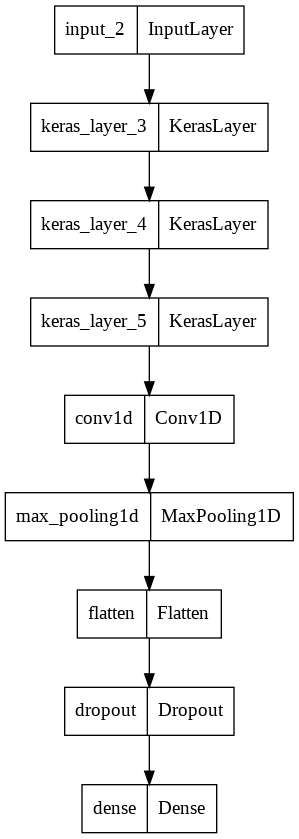

In [ ]:
tf.keras.utils.plot_model( 
    embedding_model,
    to_file="model.png",
    #show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    #dpi=180,
)

In [ ]:
embedding_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
embedding_model.fit(
    X_train, 
    y_train,
    #validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels), # Implementarlo a veces ayuda al modelo
    epochs=80,
    batch_size=53
)

Epoch 1/80
4/4 [==============================] - 23s 2s/step - loss: 3184.5793 - mae: 54.7676
Epoch 2/80
4/4 [==============================] - 10s 2s/step - loss: 913.8195 - mae: 26.9009
Epoch 3/80
4/4 [==============================] - 10s 2s/step - loss: 204.8557 - mae: 11.1273
Epoch 4/80
4/4 [==============================] - 9s 2s/step - loss: 376.4616 - mae: 16.4794
Epoch 5/80
4/4 [==============================] - 9s 2s/step - loss: 544.8443 - mae: 20.2969
Epoch 6/80
4/4 [==============================] - 9s 2s/step - loss: 310.8056 - mae: 15.1829
Epoch 7/80
4/4 [==============================] - 9s 2s/step - loss: 158.0018 - mae: 10.1312
Epoch 8/80
4/4 [==============================] - 9s 2s/step - loss: 173.3058 - mae: 10.1419
Epoch 9/80
4/4 [==============================] - 9s 2s/step - loss: 202.8847 - mae: 10.8850
Epoch 10/80
4/4 [==============================] - 9s 2s/step - loss: 176.3221 - mae: 9.9409
Epoch 11/80
4/4 [==============================] - 9s 2s/step - lo

## Observación de resultados

In [ ]:
y_pred = embedding_model.predict(X_test)

2/2 [==============================] - 3s 902ms/step


In [ ]:
y_train_pred = embedding_model.predict(X_train)

7/7 [==============================] - 9s 1s/step


Error cuadrático medio

In [ ]:
mean_squared_error(y_test,y_pred)

148.41239668620435

In [ ]:
mean_squared_error(y_train,y_train_pred)

9.708759408914633

In [ ]:
y_train[:10]

179    59.0
115    71.0
96     73.0
233    60.0
60     68.0
16     53.0
55     67.0
148    72.0
196    86.0
228    58.0
Name: meanSalary, dtype: float64

In [ ]:
y_train_pred[:10]

array([[59.31084 ],
       [75.71489 ],
       [71.929245],
       [62.121834],
       [59.296993],
       [53.84019 ],
       [70.923935],
       [70.32545 ],
       [86.54785 ],
       [61.321415]], dtype=float32)

In [ ]:
y_test[:10]

248    68.0
215    56.0
194    87.0
168    61.0
66     65.0
137    71.0
175    59.0
260    98.0
9      52.0
114    70.0
Name: meanSalary, dtype: float64

In [ ]:
y_pred[:10]

array([[65.10951 ],
       [68.04243 ],
       [68.17924 ],
       [68.94544 ],
       [67.23809 ],
       [63.48529 ],
       [66.89817 ],
       [75.28476 ],
       [61.373104],
       [66.959045]], dtype=float32)

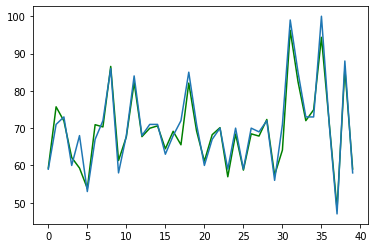

In [ ]:
plt.plot(range(40),y_train_pred[:40], c='g')
plt.plot(range(40),y_train[:40])

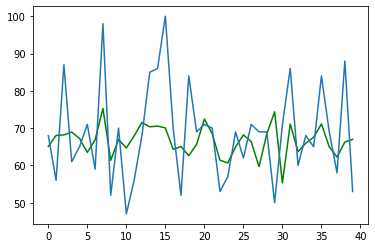

In [ ]:
plt.plot(range(40),y_pred[:40], c='g')
plt.plot(range(40),y_test[:40])

# Ejercicio:

- Ejecutar el agoritmo pero ahora utilizar la columna de 'Job Title', ¿Qué notan?

# Enlaces de interes

- Tutorial a BERT: https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Mq2PKplWfbFv